# Lab 3: Data Preprocessing

In this assignment, we will learn how to explore the raw data and preprocess it. 

The dataset we are going to exlore is an insurance data. It provides different features of each user as follows:
* age: age of the user
* sex: gender of the user
* bmi: body mass index, providing an understanding of body
* children: number of children covered by health insurance / number of dependents
* smoker: smoker or not
* region: the user's residential area in the US, northeast, southeast, southwest, northwest.

Additionally, the medical cost of each user is also provided: 
* charges: the medical cost 

Please follow Lecture 5_data_understanding and Lecture 6_data_preprocessing to complete following questions. 

### Q1. Load data with Pandas and output the basic information of this dataset, such as the features and their data types.  Which features are numerical features and which users are categorical features?


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('insurance.csv')
df.info()
print("Numerical featuers: age, bmi, children, charges")
print("Categorical featuers: sex, smoker, region")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
Numerical featuers: age, bmi, children, charges
Categorical featuers: sex, smoker, region


### Q2. Check whether there are missing values in this dataset.

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Q3. Visualize all numerical features with histogram plot to see the distribution of each numerical feature. 


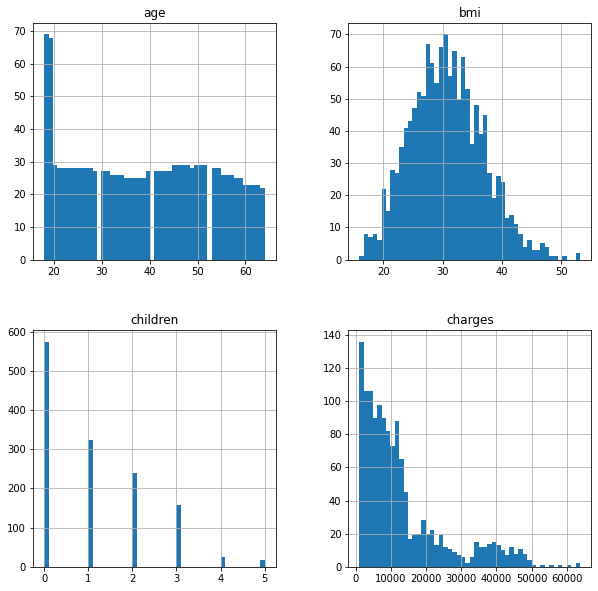

In [6]:
df.hist(bins=50, figsize=(10,10))
plt.show()

### Q4. Use corr() function of Pandas to show the correlation between different numerical features

In [4]:
hcorr = df.corr()
hcorr.style.background_gradient()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


### Q5. For all categorical features, use bar plot to visualize the number of users within each category.

<AxesSubplot:>

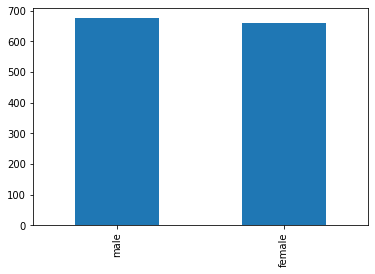

In [7]:
# your code
df['sex'].value_counts().plot(kind='bar')

<AxesSubplot:>

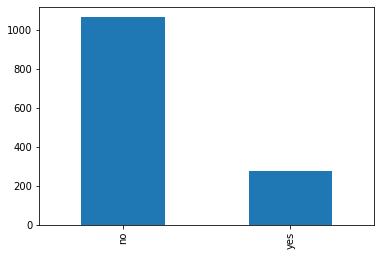

In [8]:
df['smoker'].value_counts().plot(kind='bar')

<AxesSubplot:>

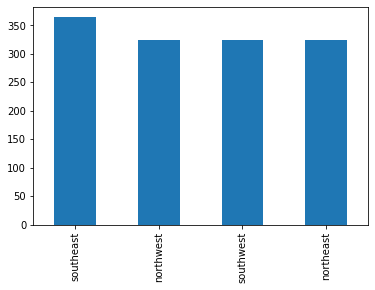

In [9]:
df['region'].value_counts().plot(kind='bar')

### Q6. Convert all categorical features into numerical features with Label Encoding or One-Hot Encoding

In [10]:
labelencoder = LabelEncoder()
df['sex'] = labelencoder.fit_transform(df['sex'])
df['smoker'] = labelencoder.fit_transform(df['smoker'])
df['region'] = labelencoder.fit_transform(df['region'])
print(df.head(5))

   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520


### Q7. Normalize all numerical features

In [12]:
# X = df.loc[:, ['age','bmi','children', 'region', 'charges']]
# print(X)
x_min = df.min(axis=0)
x_max = df.max(axis=0)
X = (df-x_min)/(x_max-x_min)
print(X)

# additional method using sklearn
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)

           age  sex       bmi  children  smoker    region   charges
0     0.021739  0.0  0.321227       0.0     1.0  1.000000  0.251611
1     0.000000  1.0  0.479150       0.2     0.0  0.666667  0.009636
2     0.217391  1.0  0.458434       0.6     0.0  0.666667  0.053115
3     0.326087  1.0  0.181464       0.0     0.0  0.333333  0.333010
4     0.304348  1.0  0.347592       0.0     0.0  0.333333  0.043816
...        ...  ...       ...       ...     ...       ...       ...
1333  0.695652  1.0  0.403820       0.6     0.0  0.333333  0.151299
1334  0.000000  0.0  0.429379       0.0     0.0  0.000000  0.017305
1335  0.000000  0.0  0.562012       0.0     0.0  0.666667  0.008108
1336  0.065217  0.0  0.264730       0.0     0.0  1.000000  0.014144
1337  0.934783  0.0  0.352704       0.0     1.0  0.333333  0.447249

[1338 rows x 7 columns]


### Q8. Save your preprocessed data into a csv file. Submit your code and the preprocessed data.

In [13]:
preprocessed_data = X
preprocessed_data.to_csv('preprocessed_data.csv', index=False)